In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

from math import sqrt 

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import os 
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib.cm import get_cmap

In [2]:


file_paths = glob("C:/Users/yoyo/Nanyang Technological University/FYP_wang xiaoni/Site 02 - 00 - NTU - N3.2-B02-01m - Origin Node/*.csv")

merged_data = pd.DataFrame()

for file_path in file_paths:
    data = pd.read_csv(file_path, header = None)
    merged_data = pd.concat([merged_data, data], ignore_index=True)

merged_data.to_csv("merged_data.csv", index=False)


In [3]:
df = merged_data

In [4]:
temp_time = df[[5, 7, 9, 13, 15, 17]]
column_mapping = {
    5: 'year',
    7: 'month',
    9: 'day',
    13: 'hour',
    15: 'minute',
    17: 'second',
}

temp_time.rename(columns=column_mapping, inplace=True)


In [5]:
datetime_series = pd.to_datetime(temp_time)
df['datetime'] = datetime_series

In [6]:
columns_to_drop = [4, 5, 6, 7, 8,9,12,13,14,15,16,17]  

df.drop(columns=columns_to_drop, inplace=True)

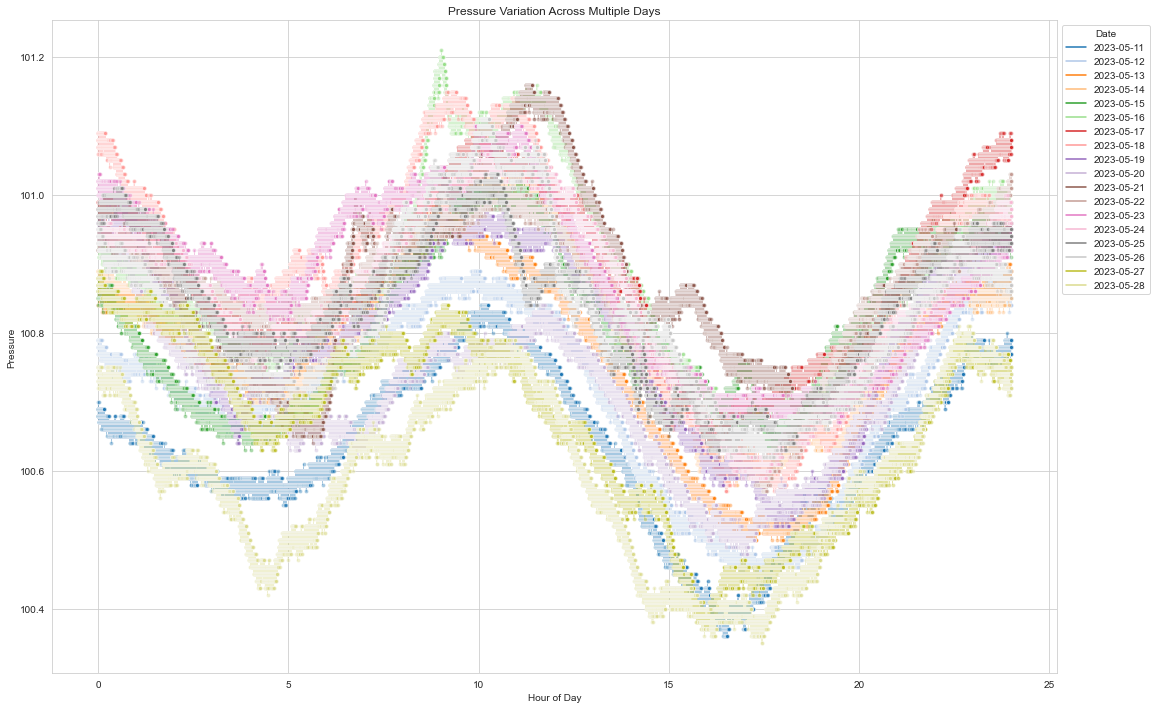

In [7]:
df['date'] = df['datetime'].dt.date

sns.set_style("whitegrid")

plt.figure(figsize=(18, 12))

sns.lineplot(data=df, x=df['datetime'].dt.hour + df['datetime'].dt.minute / 60 + df['datetime'].dt.second / 3600,
             y=df[19], hue='date', palette='tab20', alpha=0.4, marker='o', markersize=4, linewidth=0.7)

plt.xlabel('Hour of Day')
plt.ylabel('Pressure')
plt.title('Pressure Variation Across Multiple Days')
plt.grid(True)
plt.legend(title='Date', bbox_to_anchor=(1, 1))
# plt.ylim(90, 110) 
plt.show()

In [8]:

column_mapping = {
    1: 'tick',
    3: 'unix_time',
    11: 'Day_of_Week',
    19: 'Pressure',
    22: 'BARO_Temperature',
    25: 'Temperature',
    28: 'Humidity',
    31: 'APDS9960_proximity',
    33: 'APDS9960_red',
    35: 'APDS9960_green',
    37: 'APDS9960_blue',
    39: 'accel_x',
    42: 'accel_y',
    45: 'accel_z',
    48: 'gyro_x',
    51: 'gyro_y',
    54: 'gyro_z',
    57: 'magnetometer_x',
    60: 'magnetometer_y',
    63: 'magnetometer_z',
}

df.rename(columns=column_mapping, inplace=True)
columns_to_drop = [0,2,10,18,20,21,23,24,26,27,29,30,32,34,36,38,40,41,43,44,46,47,49,50,52,53,55,56,58,59,61,62,64,65]  

df.drop(columns=columns_to_drop, inplace=True)

In [9]:
sundays_data = df[df['datetime'].dt.day_name() == 'Sunday']
sundays_data = pd.concat([sundays_data, df[df['datetime'].dt.day == 20]])

mon_to_sat_data = df[(df['datetime'].dt.dayofweek >= 0) & (df['datetime'].dt.dayofweek <= 5) & (df['datetime'].dt.day != 20)]


# 

In [10]:
feature='Humidity'

In [11]:
x_sundays = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_sundays = np.array(sundays_data[feature])
x_mon_to_sat = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_mon_to_sat = np.array(mon_to_sat_data[feature])


Alpha: 0.0, MSE: 1.37


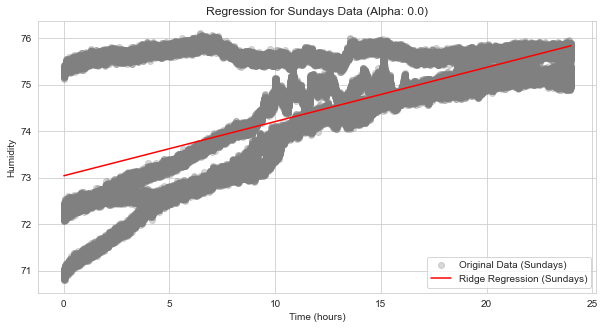

Alpha: 0.1, MSE: 1.37


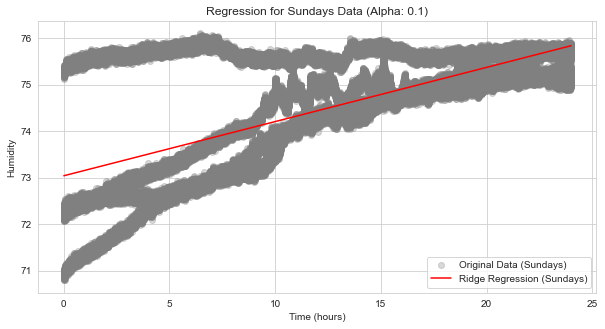

Alpha: 0.2, MSE: 1.37


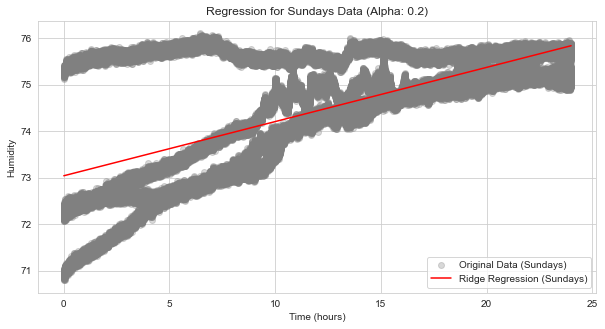

Alpha: 0.30000000000000004, MSE: 1.37


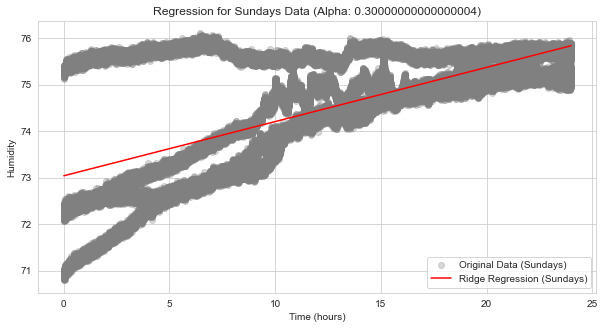

Alpha: 0.4, MSE: 1.37


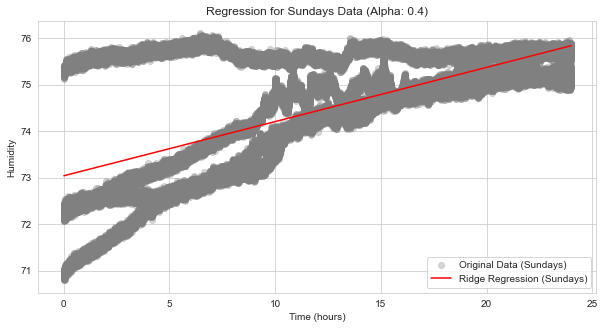

Alpha: 0.5, MSE: 1.37


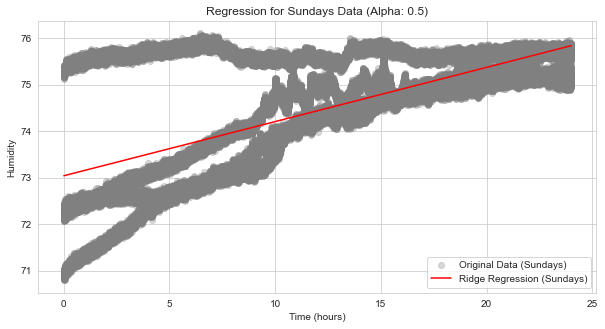

Alpha: 0.6000000000000001, MSE: 1.37


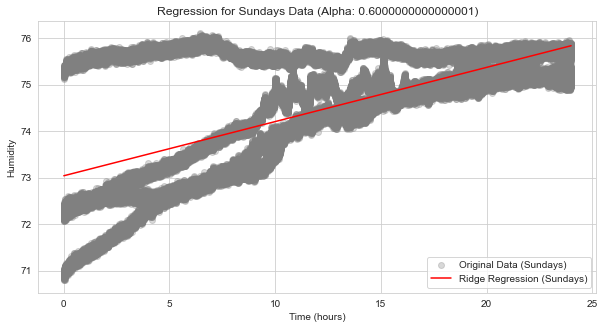

Alpha: 0.7000000000000001, MSE: 1.37


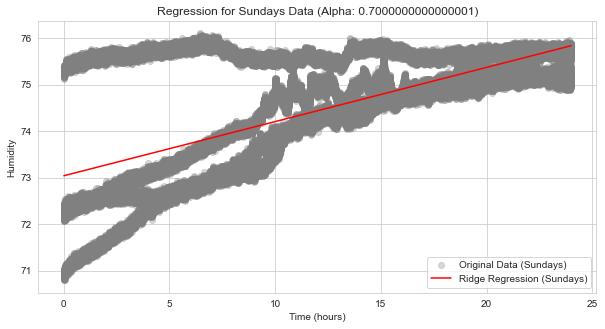

Alpha: 0.8, MSE: 1.37


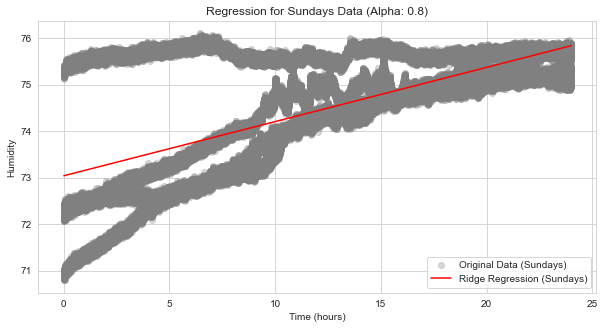

Alpha: 0.9, MSE: 1.37


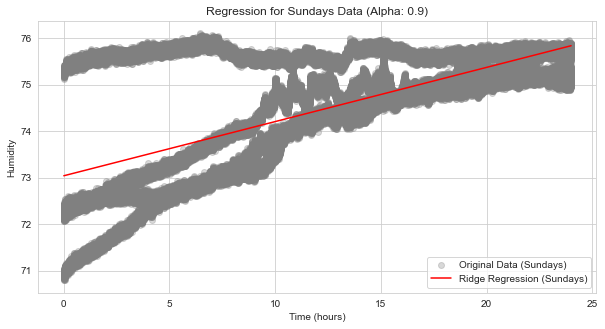

Alpha: 1.0, MSE: 1.37


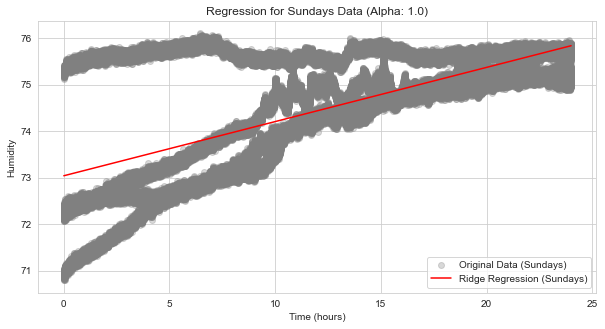

Best alpha: 0.1
Best MSE: 0.8469319000134781
Model parameters for Sundays data:
Intercept: 73.03971371943653
Coefficient: [0.11644294]
Evaluation metrics for Ridge Regression on Sundays data:
MSE: 0.85
MAE: 0.67
R^2: 0.43455969
RMSE: 0.92


In [12]:

alphas = np.linspace(0, 1, 11)

for alpha in alphas:
    model_sundays = Ridge(alpha=alpha)
    model_sundays.fit(x_sundays, y_sundays)
    
    scores = cross_val_score(model_sundays, x_sundays, y_sundays, cv=5, scoring='neg_mean_squared_error')
    
    avg_mse = -np.mean(scores)
    
    print(f"Alpha: {alpha}, MSE: {avg_mse:.2f}")
    
    x_values_sundays = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
    y_values_sundays = model_sundays.predict(x_values_sundays)
    
    plt.figure(figsize=(10, 5))
    
    plt.scatter(x_sundays, y_sundays, color='gray', alpha=0.3, label='Original Data (Sundays)')
    
    plt.plot(x_values_sundays, y_values_sundays, color='red', label=f'Ridge Regression (Sundays)')
    
    plt.xlabel('Time (hours)')
    plt.ylabel(feature)
    plt.legend()
    plt.title(f'Regression for Sundays Data (Alpha: {alpha})')
    
    plt.show()

best_alpha = alphas[np.argmin(scores)]

final_model = Ridge(alpha=best_alpha)
final_model.fit(x_sundays, y_sundays)
y_pred_sundays = final_model.predict(x_sundays)

mse_sundays = mean_squared_error(y_sundays, y_pred_sundays)
mae_sundays = mean_absolute_error(y_sundays, y_pred_sundays)
r2_sundays = r2_score(y_sundays, y_pred_sundays)
rmse_sundays = sqrt(mse_sundays)

print("Best alpha:", best_alpha)
print("Best MSE:", mse_sundays)
print("Model parameters for Sundays data:")
print("Intercept:", final_model.intercept_)
print("Coefficient:", final_model.coef_)
print("Evaluation metrics for Ridge Regression on Sundays data:")
print(f"MSE: {mse_sundays:.2f}")
print(f"MAE: {mae_sundays:.2f}")
print(f"R^2: {r2_sundays:.8f}")
print(f"RMSE: {rmse_sundays:.2f}")


Alpha: 0.0, MSE: 6.37


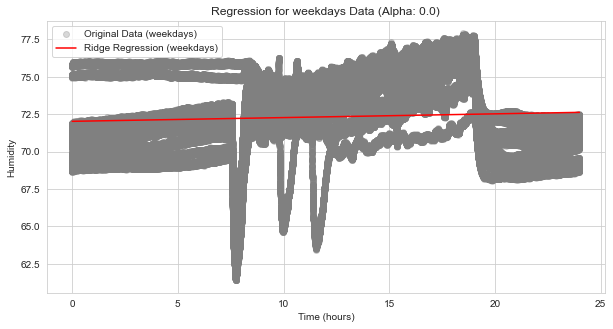

Alpha: 0.1, MSE: 6.37


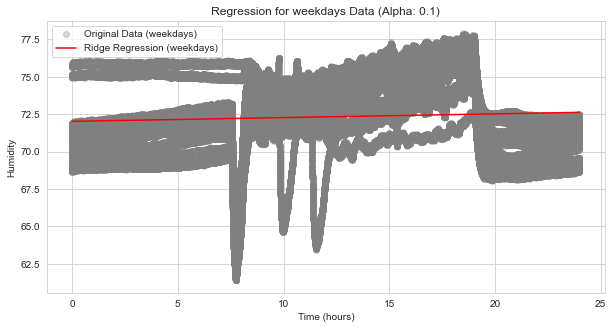

Alpha: 0.2, MSE: 6.37


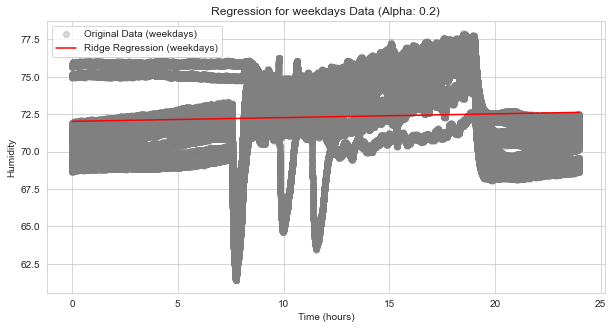

Alpha: 0.30000000000000004, MSE: 6.37


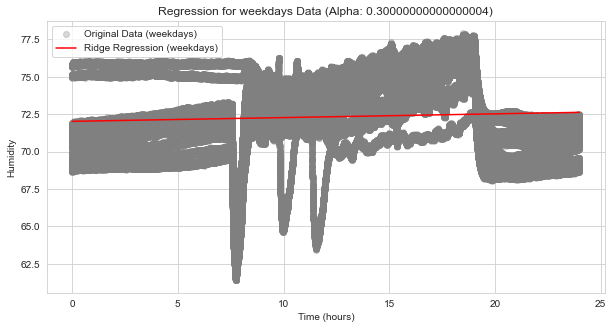

Alpha: 0.4, MSE: 6.37


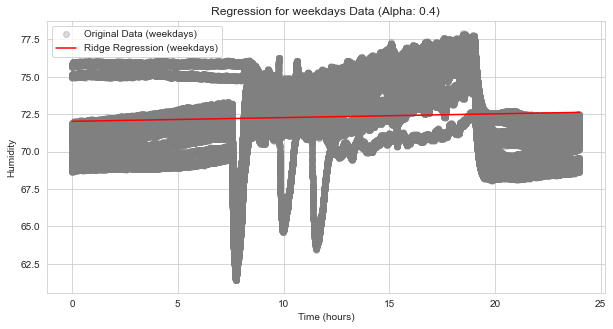

Alpha: 0.5, MSE: 6.37


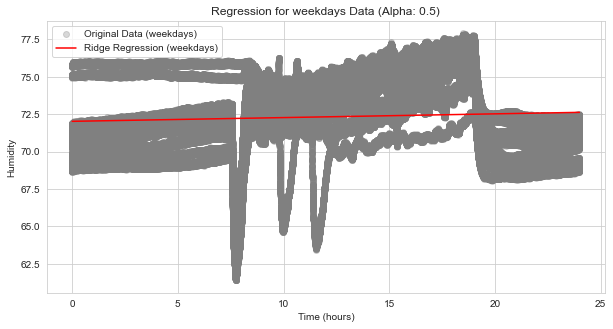

Alpha: 0.6000000000000001, MSE: 6.37


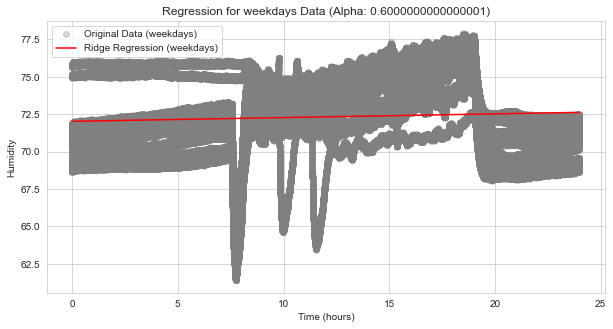

Alpha: 0.7000000000000001, MSE: 6.37


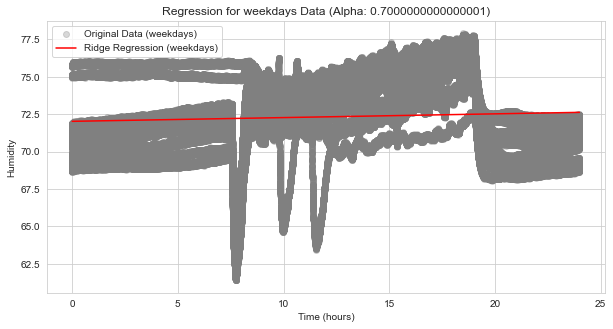

Alpha: 0.8, MSE: 6.37


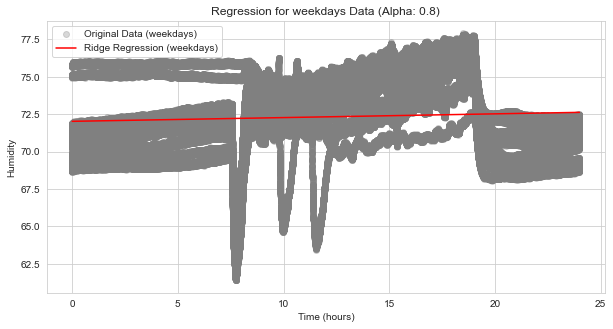

Alpha: 0.9, MSE: 6.37


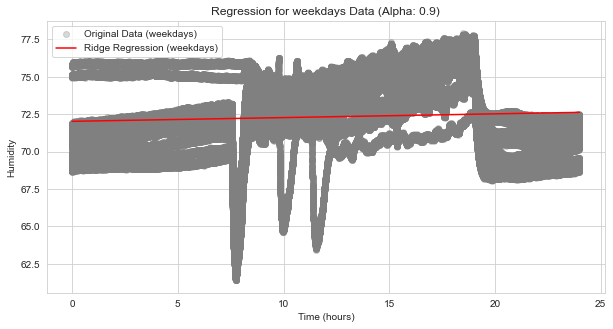

Alpha: 1.0, MSE: 6.37


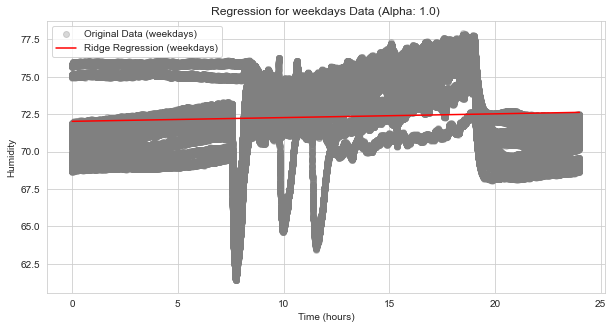

Best alpha: 0.30000000000000004
Best MSE: 5.771452170013927
Model parameters for weekdays data:
Intercept: 72.02167641373082
Coefficient: [0.02498987]
Evaluation metrics for Ridge Regression on weekdays data:
MSE: 5.77
MAE: 1.94
R^2: 0.00516782
RMSE: 2.40


In [13]:

alphas = np.linspace(0, 1, 11)

for alpha in alphas:
    model_weekdays = Ridge(alpha=alpha)
    model_weekdays.fit(x_mon_to_sat, y_mon_to_sat)
    
    scores = cross_val_score(model_weekdays, x_mon_to_sat, y_mon_to_sat, cv=5, scoring='neg_mean_squared_error')
    
    avg_mse = -np.mean(scores)
    
    print(f"Alpha: {alpha}, MSE: {avg_mse:.2f}")
    
    x_values_weekdays = np.linspace(min(x_mon_to_sat), max(x_mon_to_sat), 100).reshape(-1, 1)
    y_values_weekdays = model_weekdays.predict(x_values_weekdays)
    
    plt.figure(figsize=(10, 5))
    
    plt.scatter(x_mon_to_sat, y_mon_to_sat, color='gray', alpha=0.3, label='Original Data (weekdays)')
    
    plt.plot(x_values_weekdays, y_values_weekdays, color='red', label=f'Ridge Regression (weekdays)')
    
    plt.xlabel('Time (hours)')
    plt.ylabel(feature)
    plt.legend()
    plt.title(f'Regression for weekdays Data (Alpha: {alpha})')
    
    plt.show()

best_alpha = alphas[np.argmin(scores)]

final_model = Ridge(alpha=best_alpha)
final_model.fit(x_mon_to_sat, y_mon_to_sat)
y_pred_weekdays = final_model.predict(x_mon_to_sat)

mse_weekdays = mean_squared_error(y_mon_to_sat, y_pred_weekdays)
mae_weekdays = mean_absolute_error(y_mon_to_sat, y_pred_weekdays)
r2_weekdays = r2_score(y_mon_to_sat, y_pred_weekdays)
rmse_weekdays = sqrt(mse_weekdays)

print("Best alpha:", best_alpha)
print("Best MSE:", mse_weekdays)
print("Model parameters for weekdays data:")
print("Intercept:", final_model.intercept_)
print("Coefficient:", final_model.coef_)
print("Evaluation metrics for Ridge Regression on weekdays data:")
print(f"MSE: {mse_weekdays:.2f}")
print(f"MAE: {mae_weekdays:.2f}")
print(f"R^2: {r2_weekdays:.8f}")
print(f"RMSE: {rmse_weekdays:.2f}")


Lasso Alpha: 0.0, MSE: 1.37


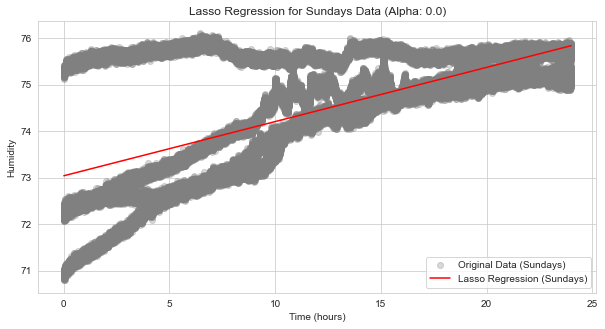

Lasso Alpha: 0.1, MSE: 1.37


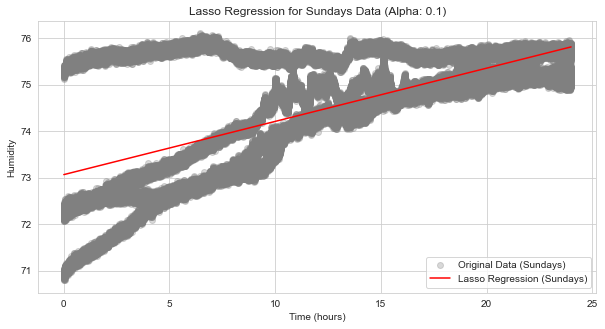

Lasso Alpha: 0.2, MSE: 1.37


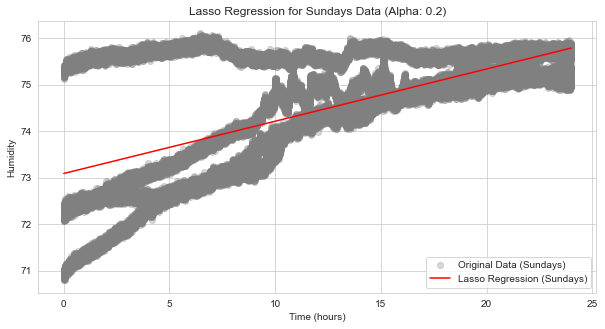

Lasso Alpha: 0.30000000000000004, MSE: 1.37


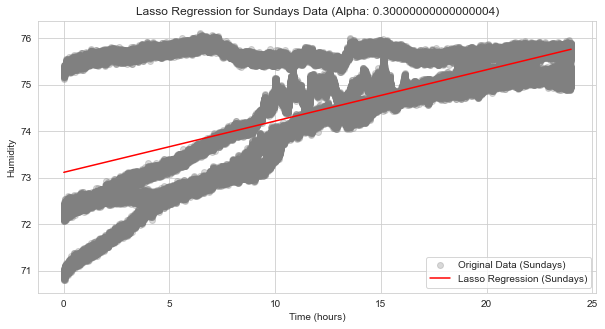

Lasso Alpha: 0.4, MSE: 1.37


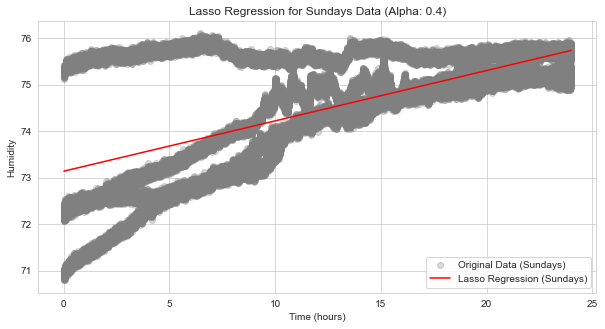

Lasso Alpha: 0.5, MSE: 1.37


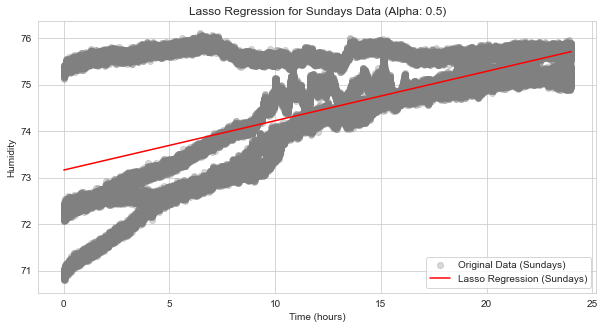

Lasso Alpha: 0.6000000000000001, MSE: 1.37


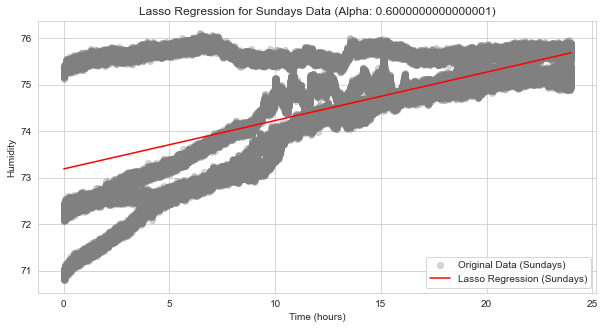

Lasso Alpha: 0.7000000000000001, MSE: 1.37


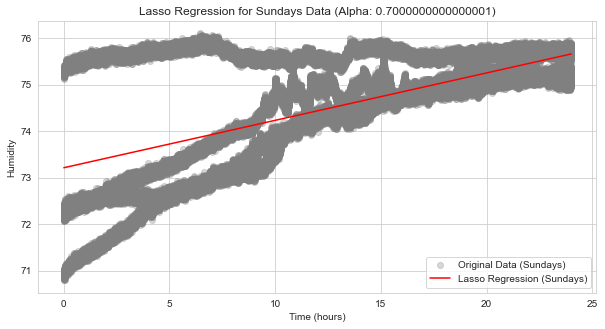

Lasso Alpha: 0.8, MSE: 1.37


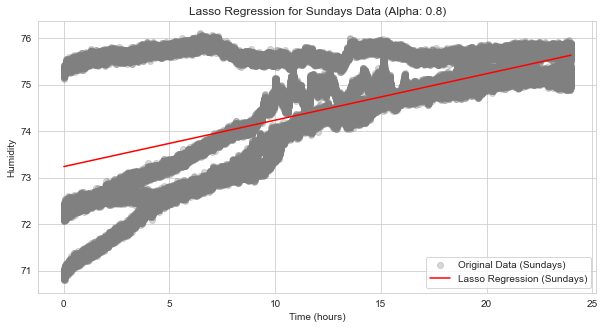

Lasso Alpha: 0.9, MSE: 1.38


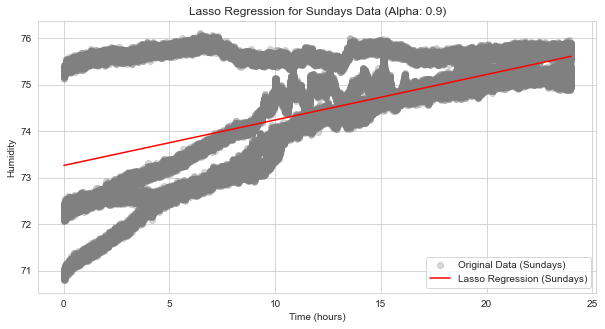

Lasso Alpha: 1.0, MSE: 1.38


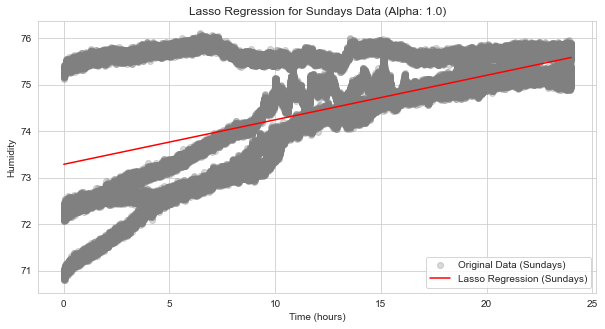

Best Lasso Alpha: 0.1
Best Lasso MSE: 0.8471402124390485
Model parameters for Lasso Regression on Sundays data:
Intercept: 73.06436850496416
Coefficient: [0.11435982]
Evaluation metrics for Lasso Regression on Sundays data:
MSE: 0.85
MAE: 0.67
R^2: 0.43442061
RMSE: 0.92


In [14]:
from sklearn.linear_model import Lasso

alphas = np.linspace(0, 1, 11)

for alpha in alphas:
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(x_sundays, y_sundays)
    
    scores = cross_val_score(model_lasso, x_sundays, y_sundays, cv=5, scoring='neg_mean_squared_error')
    
    avg_mse = -np.mean(scores)
    
    print(f"Lasso Alpha: {alpha}, MSE: {avg_mse:.2f}")
    
    x_values_sundays = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
    y_values_sundays = model_lasso.predict(x_values_sundays)
    
    plt.figure(figsize=(10, 5))
    
    plt.scatter(x_sundays, y_sundays, color='gray', alpha=0.3, label='Original Data (Sundays)')
    
    plt.plot(x_values_sundays, y_values_sundays, color='red', label=f'Lasso Regression (Sundays)')
    
    plt.xlabel('Time (hours)')
    plt.ylabel(feature)
    plt.legend()
    plt.title(f'Lasso Regression for Sundays Data (Alpha: {alpha})')
    
    plt.show()

best_alpha_lasso = alphas[np.argmin(scores)]

final_model_lasso = Lasso(alpha=best_alpha_lasso)
final_model_lasso.fit(x_sundays, y_sundays)
y_pred_sundays_lasso = final_model_lasso.predict(x_sundays)

mse_sundays_lasso = mean_squared_error(y_sundays, y_pred_sundays_lasso)
mae_sundays_lasso = mean_absolute_error(y_sundays, y_pred_sundays_lasso)
r2_sundays_lasso = r2_score(y_sundays, y_pred_sundays_lasso)
rmse_sundays_lasso = sqrt(mse_sundays_lasso)

print("Best Lasso Alpha:", best_alpha_lasso)
print("Best Lasso MSE:", mse_sundays_lasso)
print("Model parameters for Lasso Regression on Sundays data:")
print("Intercept:", final_model_lasso.intercept_)
print("Coefficient:", final_model_lasso.coef_)
print("Evaluation metrics for Lasso Regression on Sundays data:")
print(f"MSE: {mse_sundays_lasso:.2f}")
print(f"MAE: {mae_sundays_lasso:.2f}")
print(f"R^2: {r2_sundays_lasso:.8f}")
print(f"RMSE: {rmse_sundays_lasso:.2f}")


Alpha: 0.0, MSE: 6.37


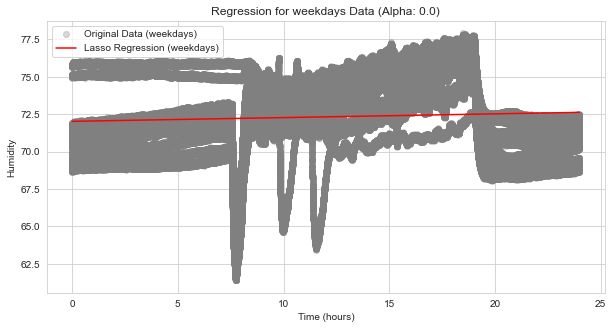

Alpha: 0.1, MSE: 6.37


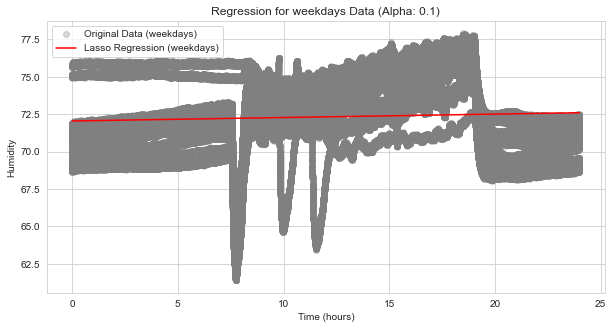

Alpha: 0.2, MSE: 6.37


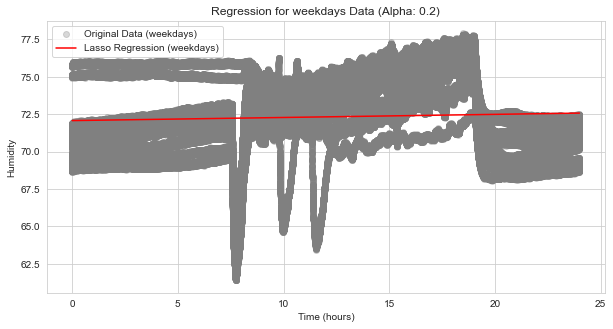

Alpha: 0.30000000000000004, MSE: 6.37


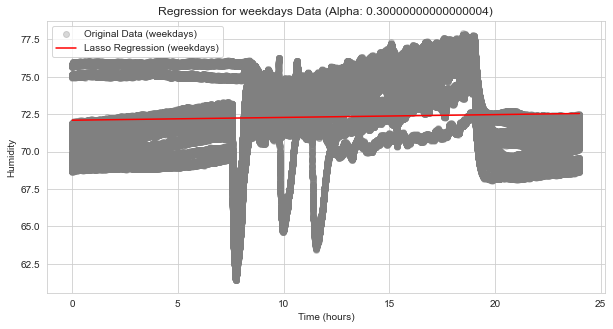

Alpha: 0.4, MSE: 6.37


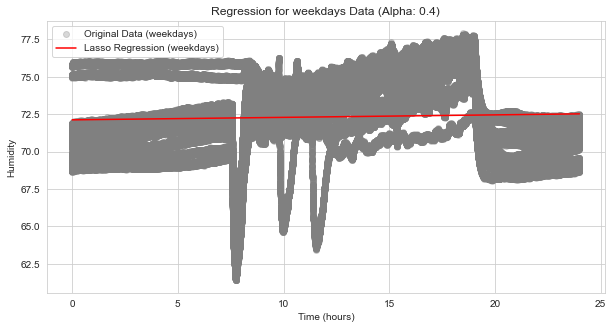

Alpha: 0.5, MSE: 6.37


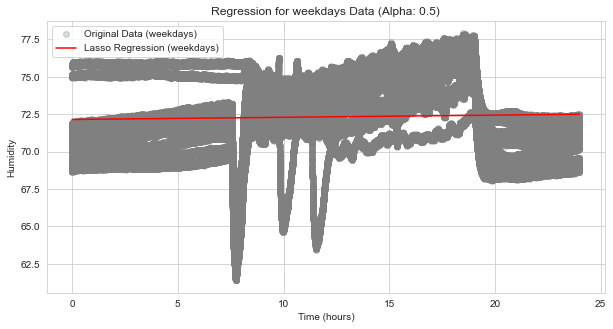

Alpha: 0.6000000000000001, MSE: 6.37


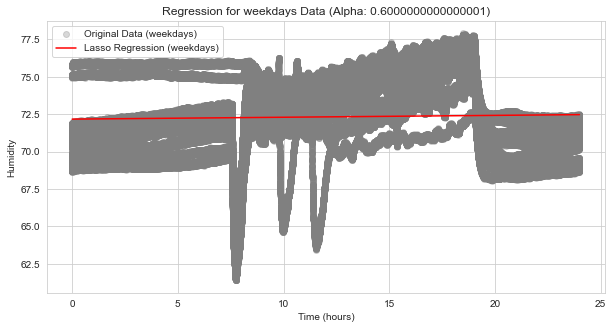

Alpha: 0.7000000000000001, MSE: 6.37


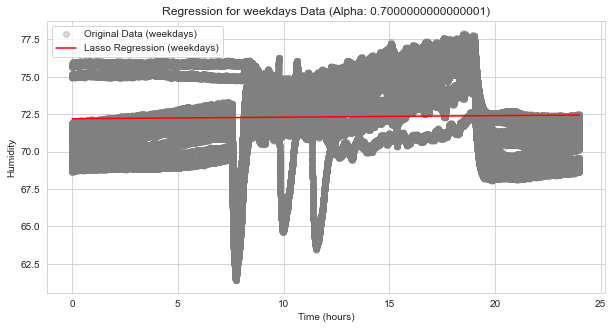

Alpha: 0.8, MSE: 6.37


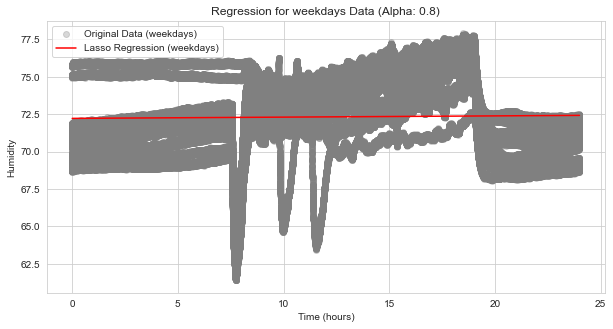

Alpha: 0.9, MSE: 6.36


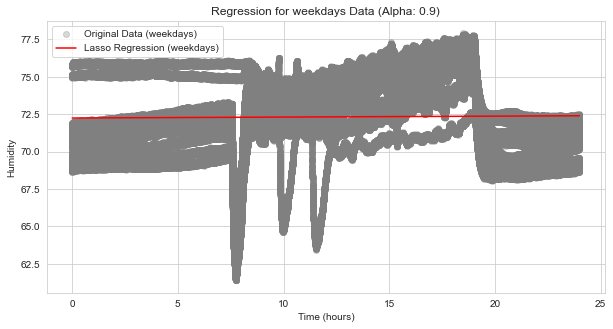

Alpha: 1.0, MSE: 6.36


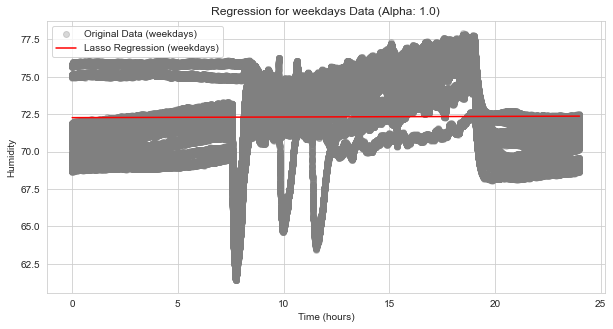

Best alpha: 0.30000000000000004
Best MSE: 5.773326852257356
Model parameters for weekdays data:
Intercept: 72.0956277438639
Coefficient: [0.01874093]
Evaluation metrics for Lasso Regression on weekdays data:
MSE: 5.77
MAE: 1.94
R^2: 0.00484468
RMSE: 2.40


In [15]:

alphas = np.linspace(0, 1, 11)

for alpha in alphas:
    model_weekdays = Lasso(alpha=alpha)
    model_weekdays.fit(x_mon_to_sat, y_mon_to_sat)
    
    scores = cross_val_score(model_weekdays, x_mon_to_sat, y_mon_to_sat, cv=5, scoring='neg_mean_squared_error')
    
    avg_mse = -np.mean(scores)
    
    print(f"Alpha: {alpha}, MSE: {avg_mse:.2f}")
    
    x_values_weekdays = np.linspace(min(x_mon_to_sat), max(x_mon_to_sat), 100).reshape(-1, 1)
    y_values_weekdays = model_weekdays.predict(x_values_weekdays)
    
    plt.figure(figsize=(10, 5))
    
    plt.scatter(x_mon_to_sat, y_mon_to_sat, color='gray', alpha=0.3, label='Original Data (weekdays)')
    
    plt.plot(x_values_weekdays, y_values_weekdays, color='red', label=f'Lasso Regression (weekdays)')
    
    plt.xlabel('Time (hours)')
    plt.ylabel(feature)
    plt.legend()
    plt.title(f'Regression for weekdays Data (Alpha: {alpha})')
    
    plt.show()

best_alpha = alphas[np.argmin(scores)]

# Lasso
final_model = Lasso(alpha=best_alpha)
final_model.fit(x_mon_to_sat, y_mon_to_sat)
y_pred_weekdays = final_model.predict(x_mon_to_sat)

mse_weekdays = mean_squared_error(y_mon_to_sat, y_pred_weekdays)
mae_weekdays = mean_absolute_error(y_mon_to_sat, y_pred_weekdays)
r2_weekdays = r2_score(y_mon_to_sat, y_pred_weekdays)
rmse_weekdays = sqrt(mse_weekdays)

print("Best alpha:", best_alpha)
print("Best MSE:", mse_weekdays)
print("Model parameters for weekdays data:")
print("Intercept:", final_model.intercept_)
print("Coefficient:", final_model.coef_)
print("Evaluation metrics for Lasso Regression on weekdays data:")
print(f"MSE: {mse_weekdays:.2f}")
print(f"MAE: {mae_weekdays:.2f}")
print(f"R^2: {r2_weekdays:.8f}")
print(f"RMSE: {rmse_weekdays:.2f}")


Best Elastic Net Alpha: 1.0
Best Elastic Net L1 Ratio: 0.1
Best Elastic Net Alpha: 1.0
Best Elastic Net L1 Ratio: 0.1
Best Elastic Net MSE: 0.8477737519335334
Model parameters for Elastic Net Regression on Sundays data:
Intercept: 73.08927717549774
Coefficient: [0.11225524]
Evaluation metrics for Elastic Net Regression on Sundays data:
MSE: 0.85
MAE: 0.67
R^2: 0.43399764
RMSE: 0.92


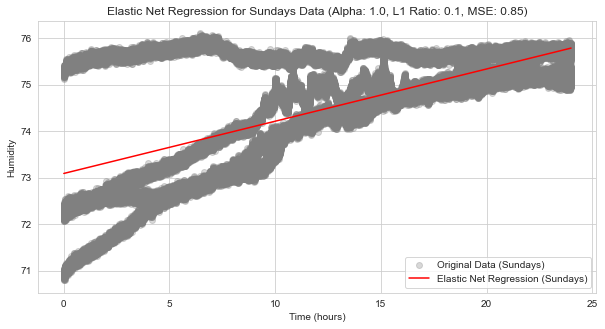

In [16]:
from sklearn.linear_model import ElasticNet
import numpy as np

alphas = np.linspace(0, 1, 11)
l1_ratios = np.linspace(0, 1, 11)

best_score = float('inf') 
best_alpha = None
best_l1_ratio = None

for alpha in alphas:
    for l1_ratio in l1_ratios:
        model_elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model_elastic_net.fit(x_sundays, y_sundays)
        scores = cross_val_score(model_elastic_net, x_sundays, y_sundays, cv=5, scoring='neg_mean_squared_error')
        avg_mse = -np.mean(scores)

        if avg_mse < best_score:
            best_score = avg_mse
            best_alpha = alpha
            best_l1_ratio = l1_ratio

print("Best Elastic Net Alpha:", best_alpha)
print("Best Elastic Net L1 Ratio:", best_l1_ratio)

final_model_elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
final_model_elastic_net.fit(x_sundays, y_sundays)
y_pred_sundays_elastic_net = final_model_elastic_net.predict(x_sundays)

mse_sundays_elastic_net = mean_squared_error(y_sundays, y_pred_sundays_elastic_net)
mae_sundays_elastic_net = mean_absolute_error(y_sundays, y_pred_sundays_elastic_net)
r2_sundays_elastic_net = r2_score(y_sundays, y_pred_sundays_elastic_net)
rmse_sundays_elastic_net = sqrt(mse_sundays_elastic_net)

print("Best Elastic Net Alpha:", best_alpha)
print("Best Elastic Net L1 Ratio:", best_l1_ratio)
print("Best Elastic Net MSE:", mse_sundays_elastic_net)
print("Model parameters for Elastic Net Regression on Sundays data:")
print("Intercept:", final_model_elastic_net.intercept_)
print("Coefficient:", final_model_elastic_net.coef_)
print("Evaluation metrics for Elastic Net Regression on Sundays data:")
print(f"MSE: {mse_sundays_elastic_net:.2f}")
print(f"MAE: {mae_sundays_elastic_net:.2f}")
print(f"R^2: {r2_sundays_elastic_net:.8f}")
print(f"RMSE: {rmse_sundays_elastic_net:.2f}")


final_model_elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
final_model_elastic_net.fit(x_sundays, y_sundays)
y_pred_sundays_elastic_net = final_model_elastic_net.predict(x_sundays)

mse_sundays_elastic_net = mean_squared_error(y_sundays, y_pred_sundays_elastic_net)

x_values_sundays = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
y_values_sundays = final_model_elastic_net.predict(x_values_sundays)

plt.figure(figsize=(10, 5))

plt.scatter(x_sundays, y_sundays, color='gray', alpha=0.3, label='Original Data (Sundays)')
plt.plot(x_values_sundays, y_values_sundays, color='red', label=f'Elastic Net Regression (Sundays)')

plt.xlabel('Time (hours)')
plt.ylabel(feature)
plt.legend()
plt.title(f'Elastic Net Regression for Sundays Data (Alpha: {best_alpha}, L1 Ratio: {best_l1_ratio}, MSE: {mse_sundays_elastic_net:.2f})')

plt.show()


Best Elastic Net Alpha: 1.0
Best Elastic Net L1 Ratio: 1.0
Best Elastic Net Alpha: 1.0
Best Elastic Net L1 Ratio: 1.0
Best Elastic Net MSE: 5.792281972718711
Model parameters for Elastic Net Regression on weekdays data:
Intercept: 72.26818085175663
Coefficient: [0.00416007]
Evaluation metrics for Elastic Net Regression on weekdays data:
MSE: 5.79
MAE: 1.95
R^2: 0.00
RMSE: 2.41


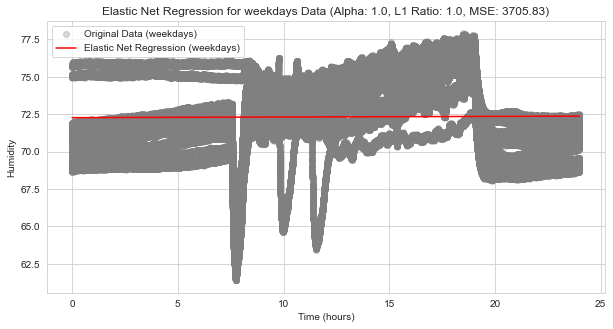

In [17]:
from sklearn.linear_model import ElasticNet
import numpy as np

alphas = np.linspace(0, 1, 11)
l1_ratios = np.linspace(0, 1, 11)

best_score = float('inf')  # Initialize the best score to a high value
best_alpha = None
best_l1_ratio = None

for alpha in alphas:
    for l1_ratio in l1_ratios:
        model_elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model_elastic_net.fit(x_mon_to_sat, y_mon_to_sat)
        scores = cross_val_score(model_elastic_net, x_mon_to_sat, y_mon_to_sat, cv=5, scoring='neg_mean_squared_error')
        avg_mse = -np.mean(scores)

        if avg_mse < best_score:
            best_score = avg_mse
            best_alpha = alpha
            best_l1_ratio = l1_ratio

print("Best Elastic Net Alpha:", best_alpha)
print("Best Elastic Net L1 Ratio:", best_l1_ratio)

final_model_elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
final_model_elastic_net.fit(x_mon_to_sat, y_mon_to_sat)
y_pred_weekdays_elastic_net = final_model_elastic_net.predict(x_mon_to_sat)

mse_weekdays_elastic_net = mean_squared_error(y_mon_to_sat, y_pred_weekdays_elastic_net)
mae_weekdays_elastic_net = mean_absolute_error(y_mon_to_sat, y_pred_weekdays_elastic_net)
r2_weekdays_elastic_net = r2_score(y_mon_to_sat, y_pred_weekdays_elastic_net)
rmse_weekdays_elastic_net = sqrt(mse_weekdays_elastic_net)

print("Best Elastic Net Alpha:", best_alpha)
print("Best Elastic Net L1 Ratio:", best_l1_ratio)
print("Best Elastic Net MSE:", mse_weekdays_elastic_net)
print("Model parameters for Elastic Net Regression on weekdays data:")
print("Intercept:", final_model_elastic_net.intercept_)
print("Coefficient:", final_model_elastic_net.coef_)
print("Evaluation metrics for Elastic Net Regression on weekdays data:")
print(f"MSE: {mse_weekdays_elastic_net:.2f}")
print(f"MAE: {mae_weekdays_elastic_net:.2f}")
print(f"R^2: {r2_weekdays_elastic_net:.2f}")
print(f"RMSE: {rmse_weekdays_elastic_net:.2f}")


final_model_elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
final_model_elastic_net.fit(x_mon_to_sat, y_mon_to_sat)
y_pred_weekdays_elastic_net = final_model_elastic_net.predict(x_mon_to_sat)

mse_weekdays_elastic_net = mean_squared_error(x_mon_to_sat, y_pred_weekdays_elastic_net)

x_values_weekdays = np.linspace(min(x_mon_to_sat), max(x_mon_to_sat), 100).reshape(-1, 1)
y_values_weekdays = final_model_elastic_net.predict(x_values_weekdays)

plt.figure(figsize=(10, 5))

plt.scatter(x_mon_to_sat, y_mon_to_sat, color='gray', alpha=0.3, label='Original Data (weekdays)')
plt.plot(x_values_weekdays, y_values_weekdays, color='red', label=f'Elastic Net Regression (weekdays)')

plt.xlabel('Time (hours)')
plt.ylabel(feature)
plt.legend()
plt.title(f'Elastic Net Regression for weekdays Data (Alpha: {best_alpha}, L1 Ratio: {best_l1_ratio}, MSE: {mse_weekdays_elastic_net:.2f})')

plt.show()


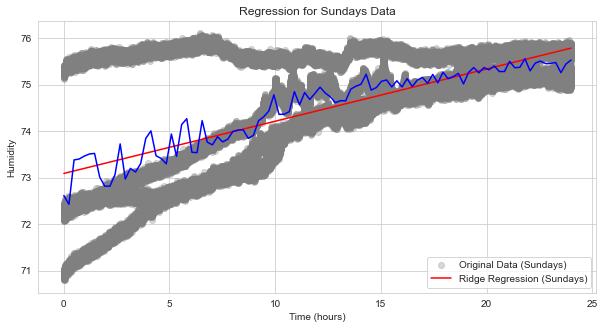

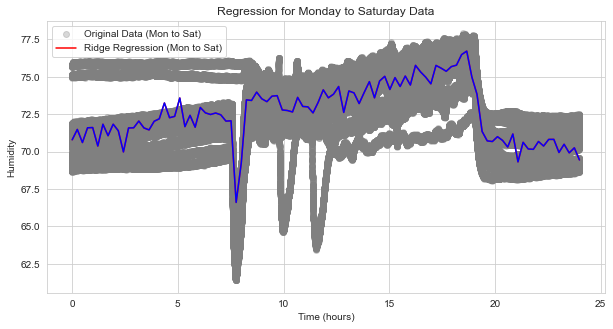

Evaluation metrics for Ridge Regression on Sundays data:
MSE: 0.82
MAE: 0.65
R^2: 0.45
RMSE: 0.91

Evaluation metrics for KNN Regression on Sundays data:
MSE: 0.82
MAE: 0.65
R^2: 0.45
RMSE: 0.91

Evaluation metrics for Ridge Regression on Monday to Saturday data:
MSE: 3.09
MAE: 1.33
R^2: 0.47
RMSE: 1.76

Evaluation metrics for KNN Regression on Monday to Saturday data:
MSE: 3.09
MAE: 1.33
R^2: 0.47
RMSE: 1.76


In [18]:
from sklearn.neighbors import KNeighborsRegressor

knn_sundays = KNeighborsRegressor(n_neighbors=5)  
knn_sundays.fit(x_sundays, y_sundays)

y_pred_sundays_knn = knn_sundays.predict(x_sundays)

mse_sundays_knn = mean_squared_error(y_sundays, y_pred_sundays_knn)
mae_sundays_knn = mean_absolute_error(y_sundays, y_pred_sundays_knn)
r2_sundays_knn = r2_score(y_sundays, y_pred_sundays_knn)
rmse_sundays_knn = sqrt(mse_sundays_knn)



knn_mon_to_sat = KNeighborsRegressor(n_neighbors=5)  
knn_mon_to_sat.fit(x_mon_to_sat, y_mon_to_sat)

y_pred_mon_to_sat_knn = knn_mon_to_sat.predict(x_mon_to_sat)

mse_mon_to_sat_knn = mean_squared_error(y_mon_to_sat, y_pred_mon_to_sat_knn)
mae_mon_to_sat_knn = mean_absolute_error(y_mon_to_sat, y_pred_mon_to_sat_knn)
r2_mon_to_sat_knn = r2_score(y_mon_to_sat, y_pred_mon_to_sat_knn)
rmse_mon_to_sat_knn = sqrt(mse_mon_to_sat_knn)


x_values_sundays_knn = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
y_values_sundays_knn = knn_sundays.predict(x_values_sundays_knn)


x_values_mon_to_sat_knn = np.linspace(min(x_mon_to_sat), max(x_mon_to_sat), 100).reshape(-1, 1)
y_values_mon_to_sat_knn = knn_mon_to_sat.predict(x_values_mon_to_sat_knn)




knn_sundays = KNeighborsRegressor(n_neighbors=5)
knn_sundays.fit(x_sundays, y_sundays)


plt.figure(figsize=(10, 5))

plt.scatter(x_sundays, y_sundays, color='gray', alpha=0.3, label='Original Data (Sundays)')

plt.plot(x_values_sundays, y_values_sundays, color='red', label=f'Ridge Regression (Sundays)')

plt.xlabel('Time (hours)')
plt.ylabel(feature)
plt.legend()
plt.title('Regression for Sundays Data')

plt.plot(x_values_sundays_knn, y_values_sundays_knn, color='blue', label=f'KNN Regression (Sundays)')

plt.show()


knn_mon_to_sat = KNeighborsRegressor(n_neighbors=5)
knn_mon_to_sat.fit(x_mon_to_sat, y_mon_to_sat)


plt.figure(figsize=(10, 5))

plt.scatter(x_mon_to_sat, y_mon_to_sat, color='gray', alpha=0.3, label='Original Data (Mon to Sat)')

plt.plot(x_values_mon_to_sat_knn, y_values_mon_to_sat_knn, color='red', label=f'Ridge Regression (Mon to Sat)')

plt.xlabel('Time (hours)')
plt.ylabel(feature)
plt.legend()
plt.title('Regression for Monday to Saturday Data')


plt.plot(x_values_mon_to_sat_knn, y_values_mon_to_sat_knn, color='blue', label=f'KNN Regression (Mon to Sat)')

plt.show()

print("Evaluation metrics for Ridge Regression on Sundays data:")
print(f"MSE: {mse_sundays_knn:.2f}")
print(f"MAE: {mae_sundays_knn:.2f}")
print(f"R^2: {r2_sundays_knn:.2f}")
print(f"RMSE: {rmse_sundays_knn:.2f}")

print("\nEvaluation metrics for KNN Regression on Sundays data:")
print(f"MSE: {mse_sundays_knn:.2f}")
print(f"MAE: {mae_sundays_knn:.2f}")
print(f"R^2: {r2_sundays_knn:.2f}")
print(f"RMSE: {rmse_sundays_knn:.2f}")

print("\nEvaluation metrics for Ridge Regression on Monday to Saturday data:")
print(f"MSE: {mse_mon_to_sat_knn:.2f}")
print(f"MAE: {mae_mon_to_sat_knn:.2f}")
print(f"R^2: {r2_mon_to_sat_knn:.2f}")
print(f"RMSE: {rmse_mon_to_sat_knn:.2f}")

print("\nEvaluation metrics for KNN Regression on Monday to Saturday data:")
print(f"MSE: {mse_mon_to_sat_knn:.2f}")
print(f"MAE: {mae_mon_to_sat_knn:.2f}")
print(f"R^2: {r2_mon_to_sat_knn:.2f}")
print(f"RMSE: {rmse_mon_to_sat_knn:.2f}")



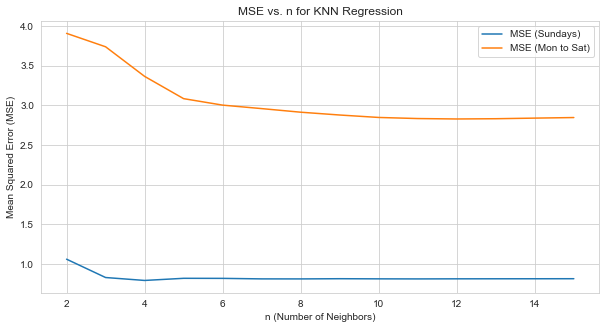

Best n for Sundays: 15
Best n for Mon to Sat: 15


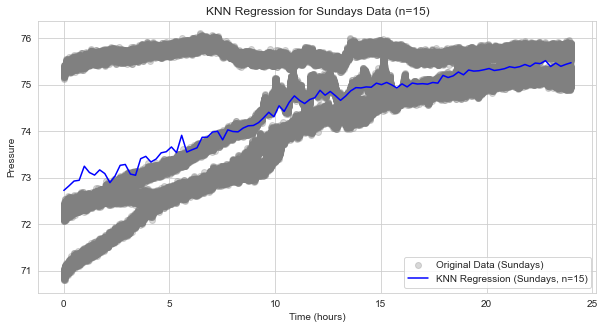

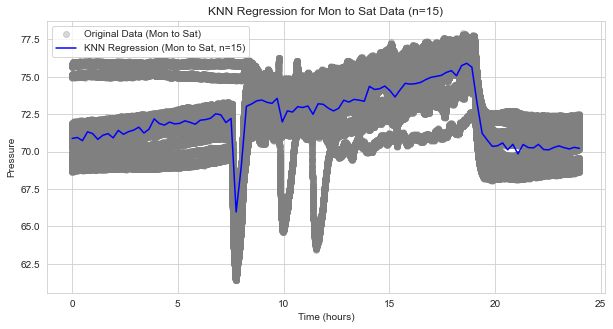

Best MSE for Sundays: 0.8145580717311761
Best MSE for Mon to Sat: 2.847069136476874
Best R-squared for Sundays: 0.45617355028498263
Best R-squared for Mon to Sat: 0.5092472562161907
Best MAE for Sundays: 0.6563335783865374
Best MAE for Mon to Sat: 1.2901695554997201
Best RMSE for Sundays: 0.9025287096437299
Best RMSE for Mon to Sat: 1.6873260314701704


In [19]:
from sklearn.neighbors import KNeighborsRegressor

mse_sundays_knn_values = []
mse_mon_to_sat_knn_values = []

best_n_values = []
best_knn_models_sundays = []
best_knn_models_mon_to_sat = []

n_values = list(range(2, 16))

for n in n_values:
    knn_sundays = KNeighborsRegressor(n_neighbors=n)
    knn_sundays.fit(x_sundays, y_sundays)
    y_pred_sundays_knn = knn_sundays.predict(x_sundays)
    mse_sundays_knn = mean_squared_error(y_sundays, y_pred_sundays_knn)
    mse_sundays_knn_values.append(mse_sundays_knn)

    if not best_n_values or mse_sundays_knn < min(mse_sundays_knn_values):
        best_n_sundays = n
        best_knn_sundays = knn_sundays

    knn_mon_to_sat = KNeighborsRegressor(n_neighbors=n)
    knn_mon_to_sat.fit(x_mon_to_sat, y_mon_to_sat)
    y_pred_mon_to_sat_knn = knn_mon_to_sat.predict(x_mon_to_sat)
    mse_mon_to_sat_knn = mean_squared_error(y_mon_to_sat, y_pred_mon_to_sat_knn)
    mse_mon_to_sat_knn_values.append(mse_mon_to_sat_knn)

    if not best_n_values or mse_mon_to_sat_knn < min(mse_mon_to_sat_knn_values):
        best_n_mon_to_sat = n
        best_knn_mon_to_sat = knn_mon_to_sat

plt.figure(figsize=(10, 5))
plt.plot(n_values, mse_sundays_knn_values, label='MSE (Sundays)')
plt.plot(n_values, mse_mon_to_sat_knn_values, label='MSE (Mon to Sat)')
plt.xlabel('n (Number of Neighbors)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. n for KNN Regression')
plt.legend()
plt.show()

print("Best n for Sundays:", best_n_sundays)
print("Best n for Mon to Sat:", best_n_mon_to_sat)

x_values_sundays_knn = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
y_values_sundays_knn = best_knn_sundays.predict(x_values_sundays_knn)

x_values_mon_to_sat_knn = np.linspace(min(x_mon_to_sat), max(x_mon_to_sat), 100).reshape(-1, 1)
y_values_mon_to_sat_knn = best_knn_mon_to_sat.predict(x_values_mon_to_sat_knn)

plt.figure(figsize=(10, 5))

plt.scatter(x_sundays, y_sundays, color='gray', alpha=0.3, label='Original Data (Sundays)')
plt.plot(x_values_sundays_knn, y_values_sundays_knn, color='blue', label=f'KNN Regression (Sundays, n={best_n_sundays})')

plt.xlabel('Time (hours)')
plt.ylabel('Pressure')
plt.legend()
plt.title(f'KNN Regression for Sundays Data (n={best_n_sundays})')
plt.show()

plt.figure(figsize=(10, 5))

plt.scatter(x_mon_to_sat, y_mon_to_sat, color='gray', alpha=0.3, label='Original Data (Mon to Sat)')
plt.plot(x_values_mon_to_sat_knn, y_values_mon_to_sat_knn, color='blue', label=f'KNN Regression (Mon to Sat, n={best_n_mon_to_sat})')

plt.xlabel('Time (hours)')
plt.ylabel('Pressure')
plt.legend()
plt.title(f'KNN Regression for Mon to Sat Data (n={best_n_mon_to_sat})')
plt.show()




# Calculate the best MSE
best_mse_sundays = mse_sundays_knn_values[n_values.index(best_n_sundays)]
best_mse_mon_to_sat = mse_mon_to_sat_knn_values[n_values.index(best_n_mon_to_sat)]

# Calculate the best R-squared
r2_sundays = r2_score(y_sundays, y_pred_sundays_knn)
r2_mon_to_sat = r2_score(y_mon_to_sat, y_pred_mon_to_sat_knn)

# Calculate the best MAE
mae_sundays = mean_absolute_error(y_sundays, y_pred_sundays_knn)
mae_mon_to_sat = mean_absolute_error(y_mon_to_sat, y_pred_mon_to_sat_knn)

# Calculate the best RMSE
rmse_sundays = np.sqrt(best_mse_sundays)
rmse_mon_to_sat = np.sqrt(best_mse_mon_to_sat)

print("Best MSE for Sundays:", best_mse_sundays)
print("Best MSE for Mon to Sat:", best_mse_mon_to_sat)

print("Best R-squared for Sundays:", r2_sundays)
print("Best R-squared for Mon to Sat:", r2_mon_to_sat)

print("Best MAE for Sundays:", mae_sundays)
print("Best MAE for Mon to Sat:", mae_mon_to_sat)

print("Best RMSE for Sundays:", rmse_sundays)
print("Best RMSE for Mon to Sat:", rmse_mon_to_sat)


In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

n_values = [3,5,7,9,11,13,15,17]
best_r2_sundays = 0
best_r2_mon_to_sat = 0
best_n_sundays = None
best_n_mon_to_sat = None

for n in n_values:
    knn_sundays = KNeighborsRegressor(n_neighbors=n)
    knn_mon_to_sat = KNeighborsRegressor(n_neighbors=n)

    knn_sundays.fit(x_sundays, y_sundays)
    knn_mon_to_sat.fit(x_mon_to_sat, y_mon_to_sat)

    y_pred_sundays_knn = knn_sundays.predict(x_sundays)
    y_pred_mon_to_sat_knn = knn_mon_to_sat.predict(x_mon_to_sat)

    r2_sundays = r2_score(y_sundays, y_pred_sundays_knn)
    r2_mon_to_sat = r2_score(y_mon_to_sat, y_pred_mon_to_sat_knn)

    if r2_sundays > best_r2_sundays:
        best_r2_sundays = r2_sundays
        best_n_sundays = n
    if r2_mon_to_sat > best_r2_mon_to_sat:
        best_r2_mon_to_sat = r2_mon_to_sat
        best_n_mon_to_sat = n

print("Best n for Sundays:", best_n_sundays)
print("Best R-squared for Sundays:", best_r2_sundays)
print("Best n for Mon to Sat:", best_n_mon_to_sat)
print("Best R-squared for Mon to Sat:", best_r2_mon_to_sat)


Best n for Sundays: 11
Best R-squared for Sundays: 0.4578682507644337
Best n for Mon to Sat: 13
Best R-squared for Mon to Sat: 0.5117996586132179
